In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
datas=pd.read_csv('data.csv')

In [3]:
mappingdict={
    0:'क',
    1:'ख',
    2:'ग',
    3:'घ',
    4:'ङ',
    5:'च',
    6:'छ',
    7:'ज',
    8:'झ',
    9:'ञ',
    10:'ट',
    11:'ठ',
    12:'ड',
    13:'ढ',
    14:'ण',
    15:'त',
    16:'थ',
    17:'द',
    18:'ध',
    19:'न',
    20:'प',
    21:'फ',
    22:'ब',
    23:'भ',
    24:'म',
    25:'य',
    26:'र',
    27:'ल',
    28:'व',
    29:'श',
    30:'ष',
    31:'स',
    32:'ह',
    33:'क्ष',
    34:'त्र',
    35:'ज्ञ',
    36:'०',
    37:'१',
    38:'२',
    39:'३',
    40:'४',
    41:'५',
    42:'६',
    43:'७',
    44:'८',
    45:'९'    
}

In [4]:
datas.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
inputs=datas.drop('character',axis=1)

In [6]:
outputs=datas.character

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
outputs=le.fit_transform(outputs)

In [10]:
outputs

array([ 0,  0,  0, ..., 45, 45, 45])

In [11]:
len(outputs)

92000

In [12]:
inputs=np.array(inputs)

In [13]:
inputs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
len(inputs)

92000

In [15]:
inputs[0]

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
len(inputs[0])

1024

In [17]:
data=[]
for item in inputs:
    data.append(item.reshape((32,32)))

In [18]:
data[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,  49, ..., 143,   0,   0],
       ...,
       [  0,   0,  28, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

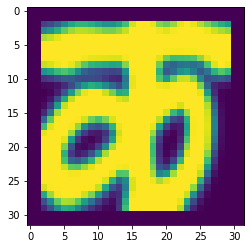

In [19]:
plt.imshow(data[0])

In [20]:
outputs[0]

0

In [21]:
data=list(data)

In [22]:
data=np.array(data)/255.0

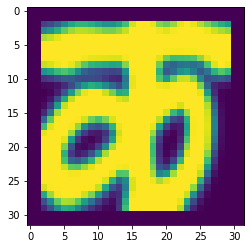

In [23]:
plt.imshow(data[0])

In [24]:
data=np.reshape(data,(data.shape[0],32,32,1))

In [25]:
outputs=np.array(outputs)

In [27]:
from keras.utils import np_utils

Using TensorFlow backend.


In [28]:
new_target=np_utils.to_categorical(outputs)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(data,new_target,test_size=0.1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
model=Sequential()

In [33]:
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [34]:
model.add(Flatten())

In [35]:
model.add(Dropout(0.5))

In [36]:
model.add(Dense(50,activation='relu'))

In [37]:
model.add(Dense(46,activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(x_train,y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 66240 samples, validate on 16560 samples
Epoch 1/20
66240/66240 [==============================] - 198s 3ms/sample - loss: 0.8750 - acc: 0.7545 - val_loss: 0.3567 - val_acc: 0.8972
Epoch 2/20
66240/66240 [==============================] - 176s 3ms/sample - loss: 0.3275 - acc: 0.9027 - val_loss: 0.2683 - val_acc: 0.9191
Epoch 3/20
66240/66240 [==============================] - 174s 3ms/sample - loss: 0.2329 - acc: 0.9299 - val_loss: 0.2428 - val_acc: 0.9263
Epoch 4/20
66240/66240 [==============================] - 173s 3ms/sample - loss: 0.1867 - acc: 0.9426 - val_loss: 0.2042 - val_acc: 0.9397
Epoch 5/20
66240/66240 [==============================] - 175s 3ms/sample - loss: 0.1517 - acc: 0.9532 - val_loss: 0.1979 - val_acc: 0.9403
Epoch 6/20
66240/66240 [==============================] - 175s 3ms/sample - loss: 0.1312 - acc: 0.9587 - val_loss: 0.2116 - val_acc: 0.9390
Epoch 7/20
66240/66240 [==============================] - 175s 3ms/sample - loss: 0.1115 - acc: 0.9632 - val_l

In [40]:
model.save('model.h5')

In [ ]:
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],'g',label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],'r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'g',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
plt.imshow(x_test[1],cmap='binary')

In [ ]:
y_test[0].argmax()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
mappingdict[prediction[434].argmax()]

In [ ]:
plt.imshow(x_test[434],cmap='binary')